<font color='green' size=6px><b> Problem Statement </b></font>


---

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

---




## Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Description:

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Data Dictionary

* RowNumber: Row number.
* CustomerId: Unique identification key for different customers.
* Surname: Surname of the customer
* Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
* Geography: The country to which the customer belongs.
* Gender: The gender of the customer.
* Age: Age of the customer.
* Tenure: The period of time a customer has been associated with the bank.
* Balance: The account balance (the amount of money deposited in the bank account) of the customer.
* NumOfProducts: How many accounts, bank account affiliated products the person has.
* HasCrCard: Does the customer have a credit card through the bank?
* IsActiveMember: Subjective, but for the concept
* EstimatedSalary: Estimated salary of the customer.
* Exited: Did they leave the bank after all?

In [6]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import optimizers
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras import initializers
print(tf.__version__)

2.3.0


---

<font color='green' size=6px><b> Reading Dataset and Feature Elimination </b></font>

---

In [7]:
#from google.colab import drive
#drive.mount("/content/drive/")
#df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/tensorflow/bank.csv').dropna()
df = pd.read_csv('bank.csv').dropna()

In [8]:
df.shape

(10000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [12]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* RowNumber and CustomerId seems to be unique for all the records as they are identifier kind of columns so we can drop them as they wont add much value to building model 
* Surname can also be dropped as its also a kind of identifier and wont add value in model building

In [13]:
df.drop(['RowNumber'],axis=1,inplace=True)
df.drop(['CustomerId'],axis=1,inplace=True)
df.drop(['Surname'],axis=1,inplace=True)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


---

<font color='green' size=6px><b> Perform an Exploratory Data Analysis on the data </b></font>

---

<font color='blue' size=5px><b> Univariate Analysis </b></font>

---

<font color='brown' size=4px><b> Box and Distribution Plot for Numeric Features </b></font>

***

In [15]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram



### Observations on CreditScore

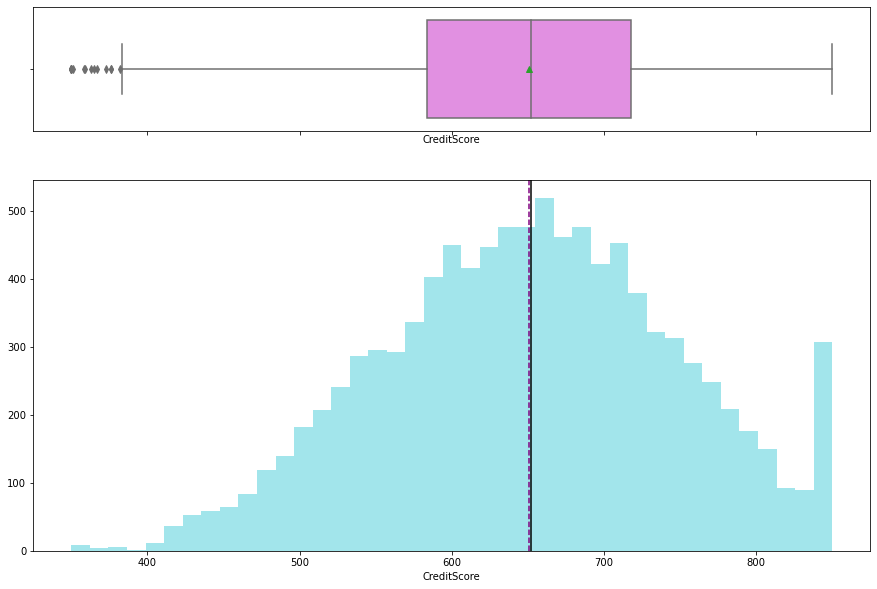

In [16]:
histogram_boxplot(df['CreditScore'])

### Observations on Balance

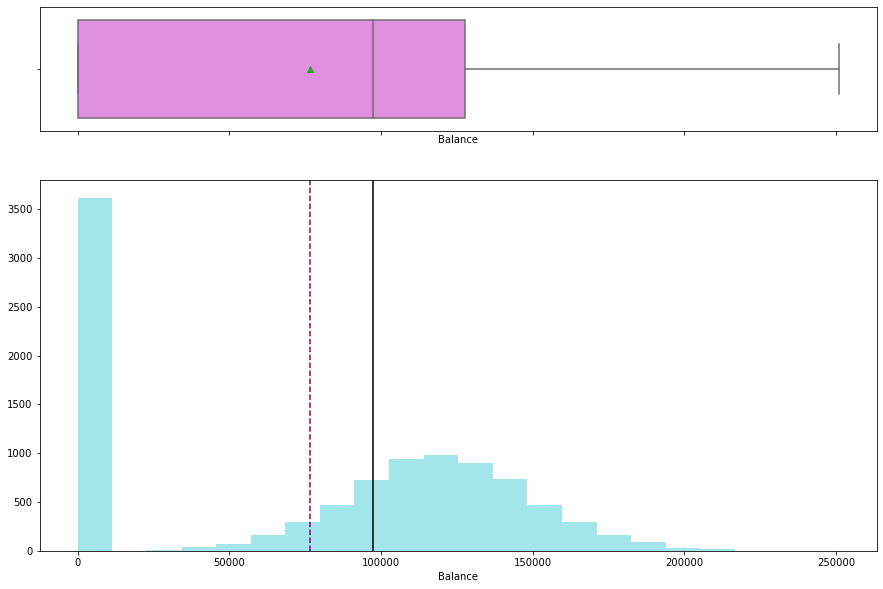

In [17]:
histogram_boxplot(df['Balance'])

### Observations on EstimatedSalary

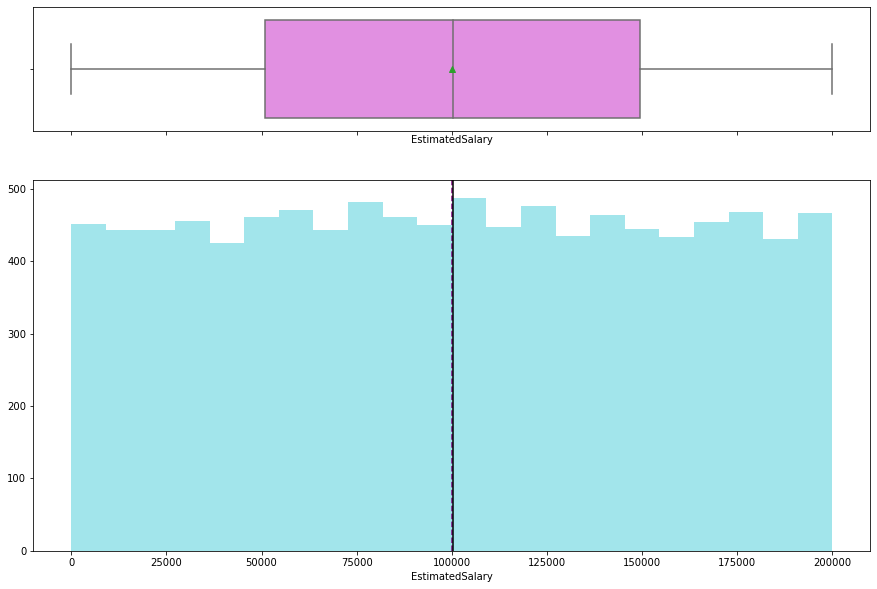

In [18]:
histogram_boxplot(df['EstimatedSalary'])

### Observations on Age

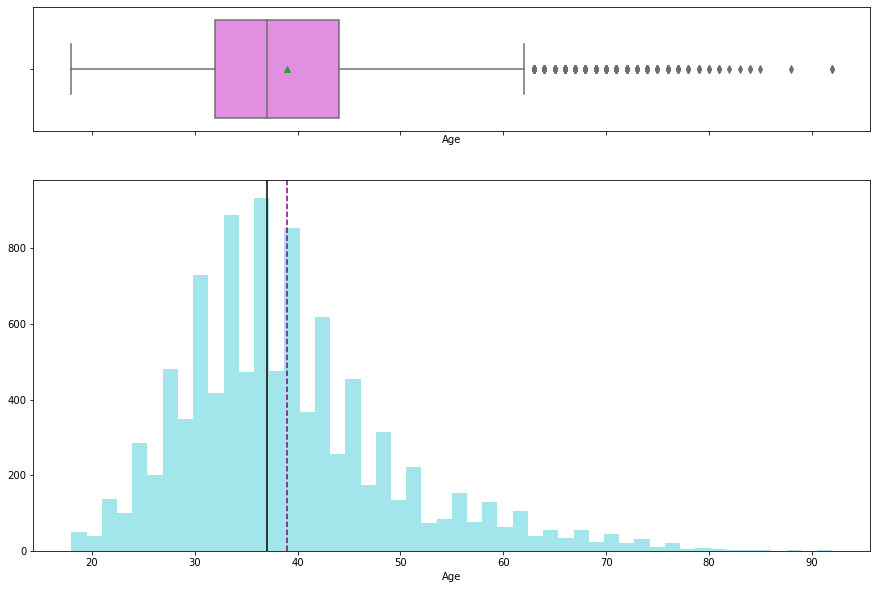

In [19]:
histogram_boxplot(df['Age'])

### Observations on Tenure

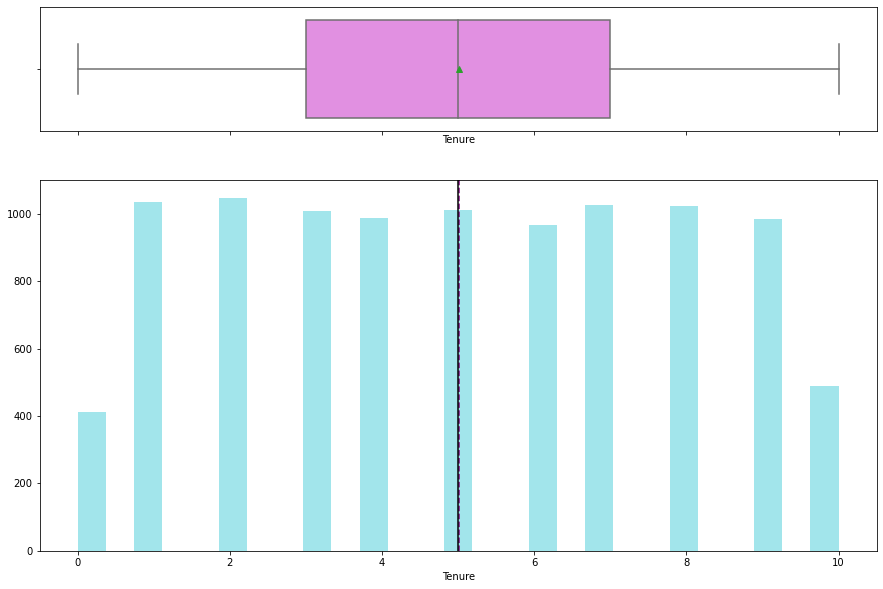

In [20]:
histogram_boxplot(df['Tenure'])

---


<font color='brown' size=4px><b> Bar plots for Categorical Features </b></font>

***

In [21]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(df[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(df[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on Geography

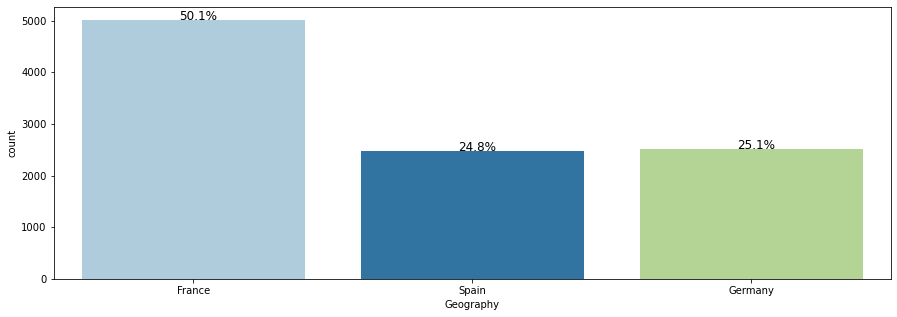

In [22]:
perc_on_bar('Geography')

### Observations on NumOfProducts

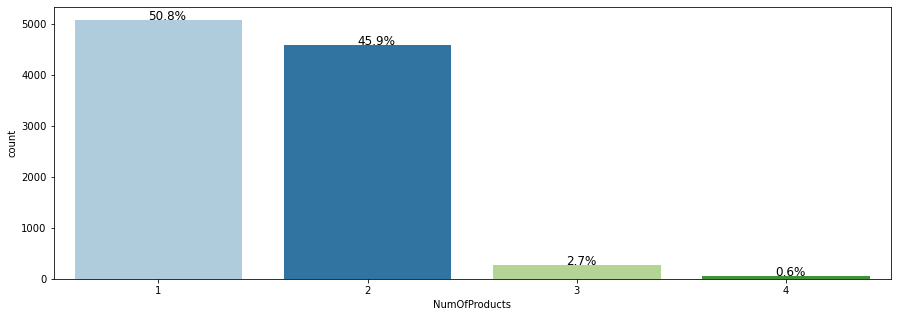

In [23]:
perc_on_bar('NumOfProducts')

### Observations on HasCrCard

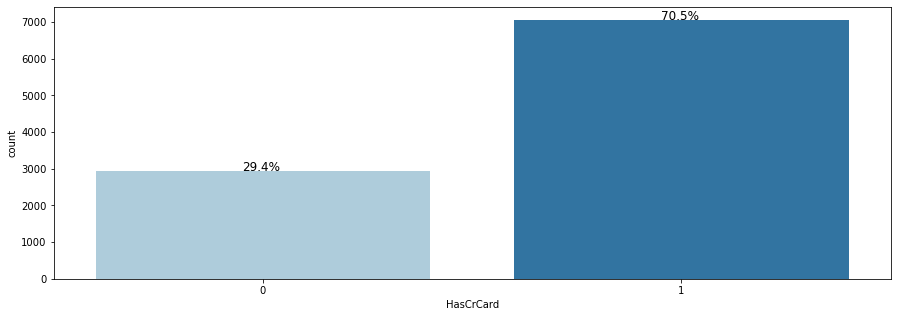

In [24]:
perc_on_bar('HasCrCard')

### Observations on IsActiveMember

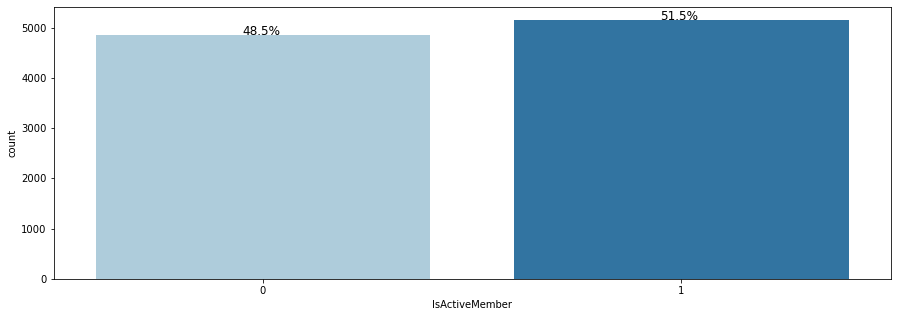

In [25]:
perc_on_bar('IsActiveMember')

### Observations on Exited

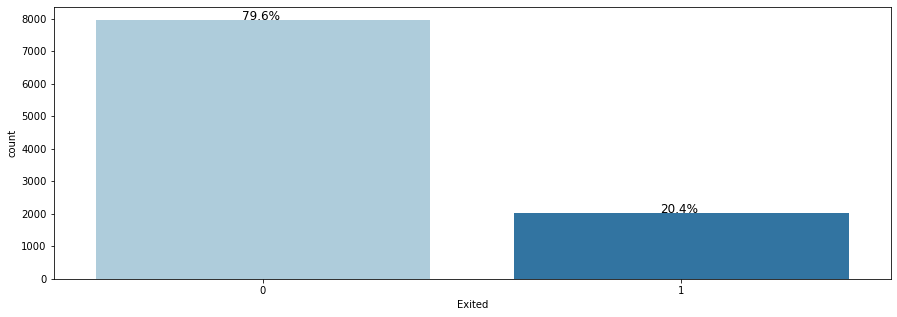

In [26]:
perc_on_bar('Exited')

---

<font color='blue' size=5px><b> Bivariate Analysis </b></font>

---

<font color='brown' size=4px><b> Stacked bar charts for categorical columns </b></font>

---

In [27]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,df['Exited'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,df['Exited'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Geography vs Exited

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


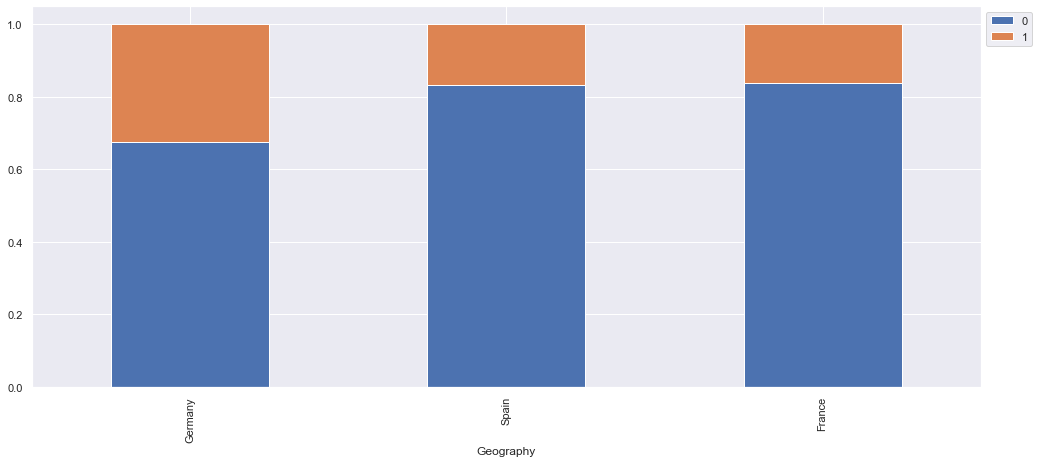

In [28]:
stacked_plot(df['Geography'])

### Gender vs Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


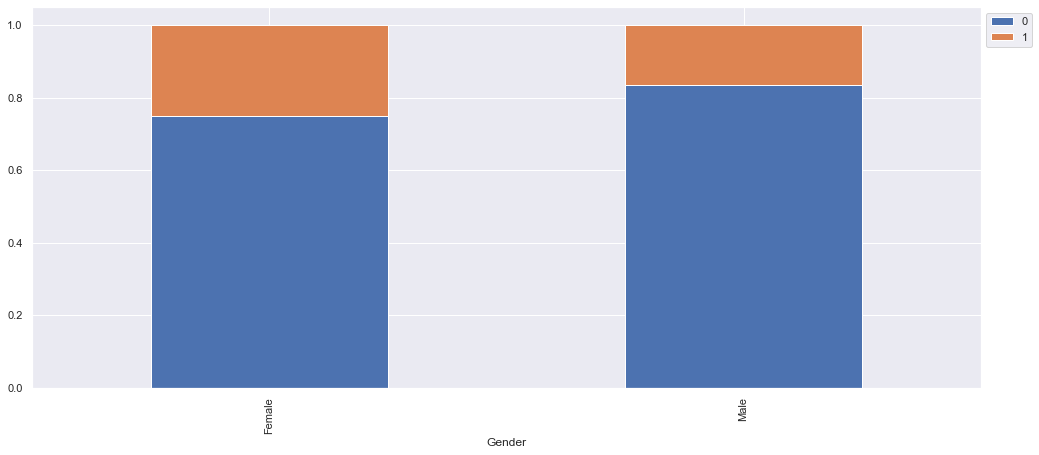

In [29]:
stacked_plot(df['Gender'])

### Age vs Exited

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
..       ...   ...    ...
79         4     0      4
78         5     0      5
77        10     0     10
76        11     0     11
75         9     0      9

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


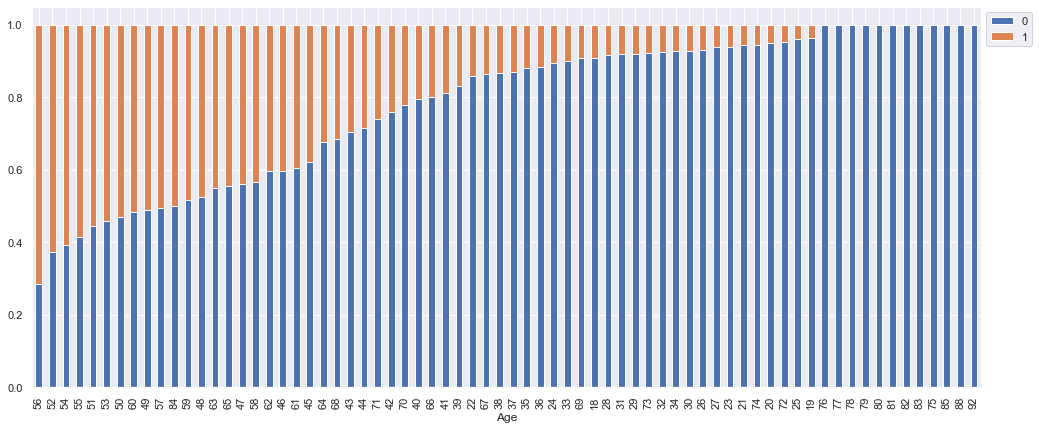

In [30]:
stacked_plot(df['Age'])

### Tenure vs Exited

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


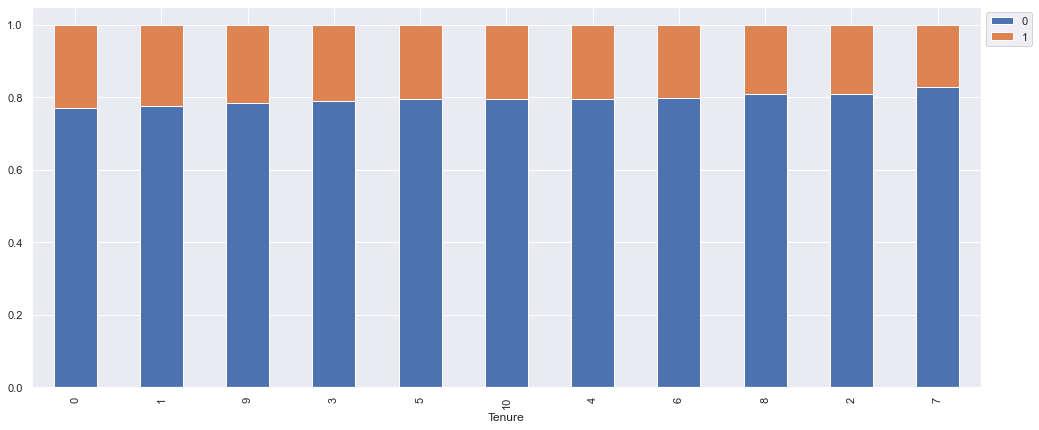

In [31]:
stacked_plot(df['Tenure'])

### NumOfProducts vs Exited

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


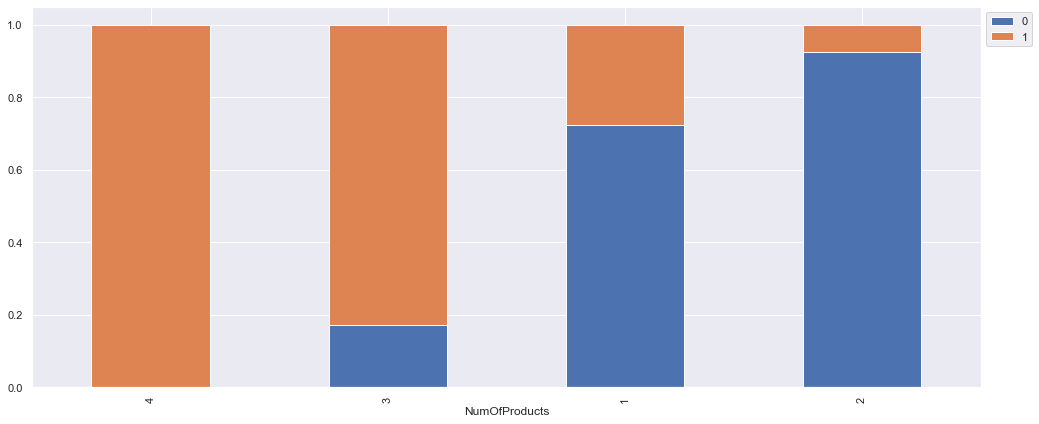

In [32]:
stacked_plot(df['NumOfProducts'])

### HasCrCard vs Exited

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


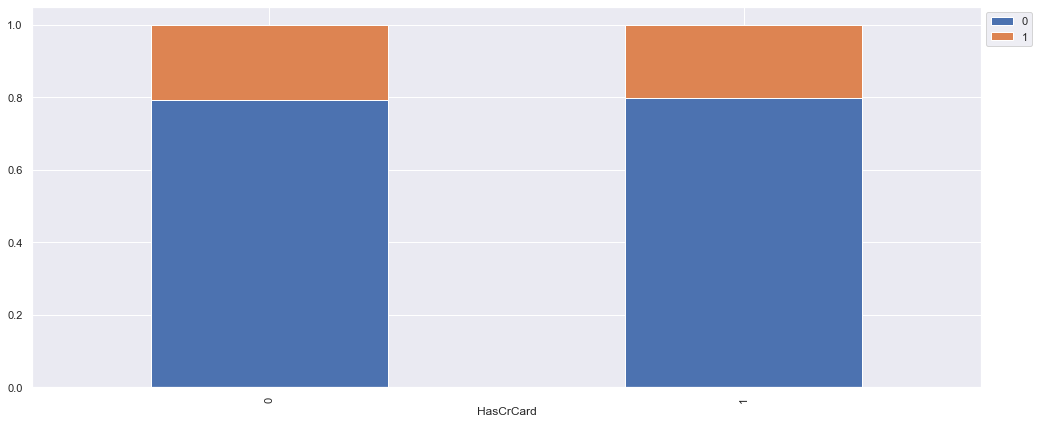

In [33]:
stacked_plot(df['HasCrCard'])

### IsActiveMember vs Exited

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


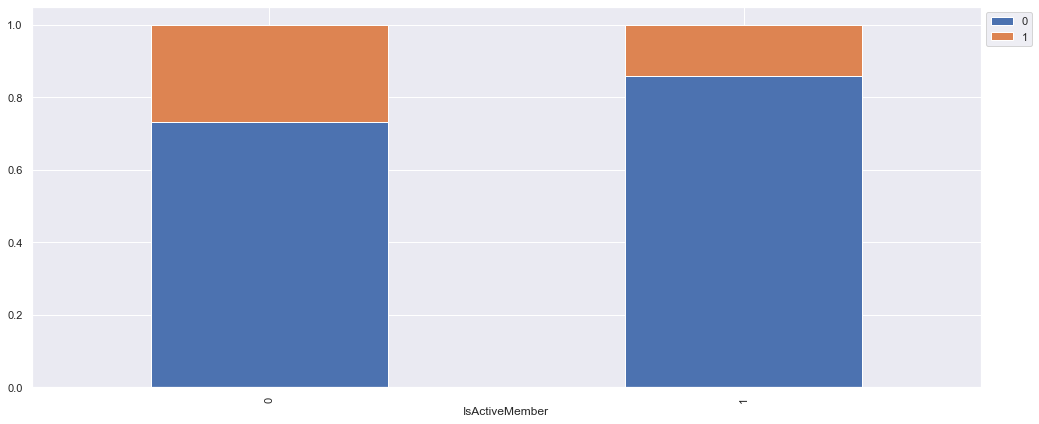

In [34]:
stacked_plot(df['IsActiveMember'])

---

<font color='brown' size=4px><b> Catplots </b></font>

---

### Catplot between Geography and CreditScore with Hue as Exited

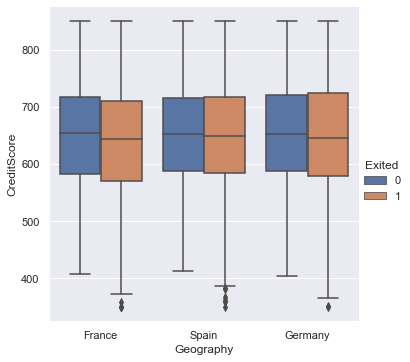

In [35]:

sns.catplot(x="Geography", y="CreditScore",
                hue="Exited",data=df, kind="box",
                height=5, aspect=1);

### Catplot between Balance and Gender with Exited as Hue

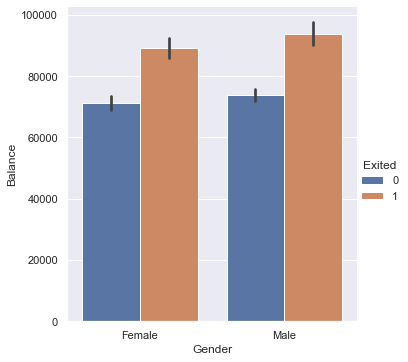

In [36]:
sns.catplot(x="Gender", y="Balance",
                hue="Exited",data=df, kind="bar",
                height=5, aspect=1);

### Catplot between NumOfProducts and EstimatedSalary with Exited as Hue

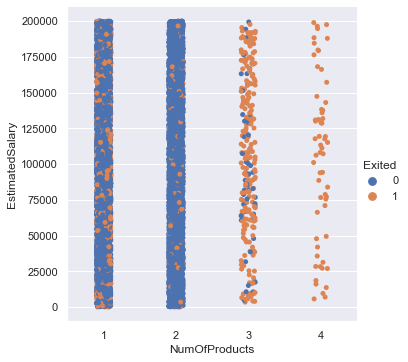

In [37]:
sns.catplot(x="NumOfProducts", y="EstimatedSalary",
                hue="Exited",data=df, kind="strip",
                height=5, aspect=1);

### Catplot between HasCrCard and EstimatedSalary with Exited as Hue

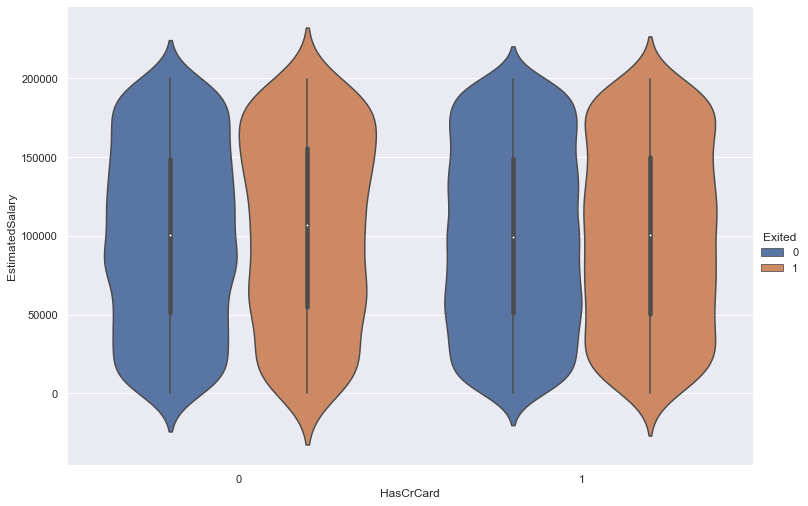

In [38]:
sns.catplot(x="HasCrCard", y="EstimatedSalary",
                hue="Exited",data=df, 
                 kind='violin', height=7, aspect=1.5, estimator=np.mean);

### Catplot between HasCrCard and Balance with Exited as Hue

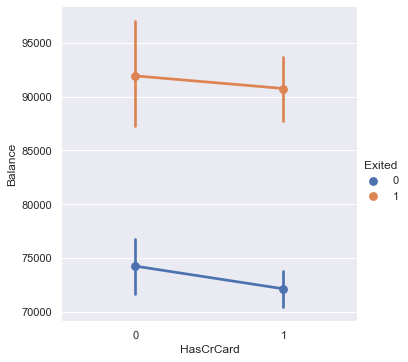

In [39]:
sns.catplot(x="HasCrCard", y="Balance",hue="Exited",data=df, kind="point",height=5, aspect=1);


---

<font color='brown' size=4px><b> Pair Plots </b></font>

---

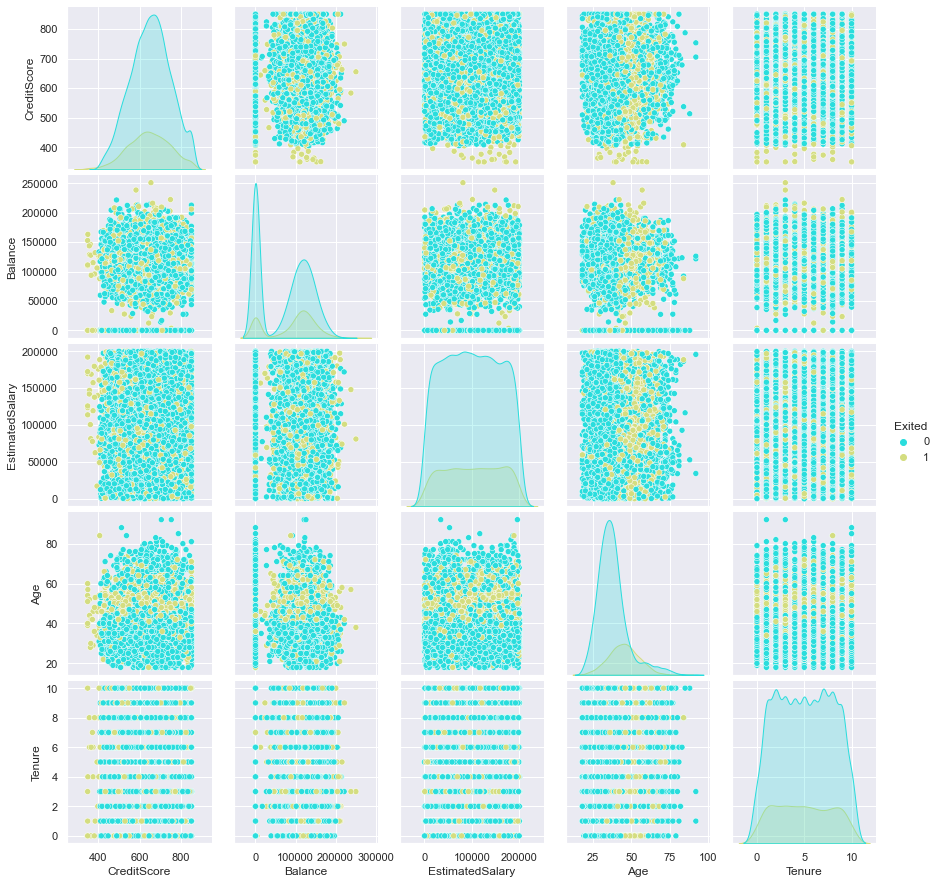

In [40]:
sns.pairplot(df,x_vars=['CreditScore','Balance','EstimatedSalary','Age','Tenure'],
 y_vars=['CreditScore','Balance','EstimatedSalary','Age','Tenure'] ,kind='scatter',diag_kind='kde',hue='Exited',palette='rainbow'
) 
plt.show()

---

<font color='brown' size=4px><b> Heat Map </b></font>

---

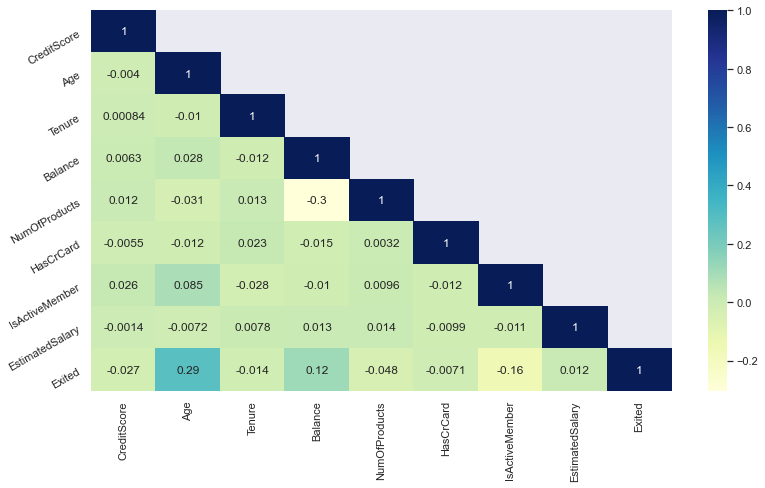

In [41]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True,cmap="YlGnBu")
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

---

<font color='green' size=6px><b> Illustrate the insights based on EDA </b></font>

---

<font color='blue' size=5px><b> Univariate Analysis </b></font>

* CreditScore seems to be normally distributed with a spike around the maximum. there are some outliers on the lower side but i will kep them because they seem to be continuos.Mean is 650,Max is 850, min is 350
* Balance seems to be normally distributed with a spike around 0.Mean is 76485, Max is 250898, min is 0
* EstimatedSalary seems to be all equally distributed. with all the counts between 400 and 500.Mean is 100090, Max is 199992.48, min is 57510
* Age seems to be right skewed with highest peak around the mean.Mean is 39, Max is 92, min is 18
* Tenure seems to be mostly equally distributed with most of the counts for each year being around 1000.0 and 10 which is minimum and maximum respectively has around 500.Mean is 5, Max is 10, min is 0
* France has the highest number of customers, about half of the total.Mean is 76485, Max is 250898, min is 0
* Most of the customers hold only 1 number of product. About 50% of them.Mean is 1, Max is 4, min is 1
* about 70% of customer have credit cards.
* The number of active and non-active members are almost the same.
* About 80% of customer are with the bank and 20% have exited.
---
<font color='blue' size=5px><b> Bivariate Analysis </b></font>

* Germany has more number of Exited customers percentage wise
* Females has more number of Exited customers percentage wise
* Between 50-60 we see a large number of Exited customers percentage wise
* Tenure seems to have almost no effect on attrition
* Customers having 3 or 4 customers seem to have a large number of Exited customers percentage wise.But the total customers in these 2 categories are quite low as compared to 1and 2 so might not give the right picture
* Having a credit card seems to have no effect on Exit
* CreditScore is almost same accross Geographies and Exited
* Minimum Balance for Males who have exited is much more than Females
* All of the customers having 4 NoOfProducts Exited
* EstimatedSalary  seems to have no relation with Having a credit card and Exited
* Exited customers appear more with higher Minimum Balance 
* No clear trend is emerging from the pair plots
* from the heat map also we dont see any corelation coefficients close to 1 or -1 thats why there seems to be no relationship between 2 variables

---

<font color='green' size=6px><b> Data Pre-processing </b></font>

---

In [42]:
## FInding out value_counts under each category column
cat_cols=['Geography','Gender']
for column in cat_cols:
    print(df[column].value_counts())
    print('-'*30)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
------------------------------


In [43]:
## Doing one hot encoding for the category columns
df=pd.get_dummies(df,columns=cat_cols,drop_first=True)


In [44]:
## FInding out outliers
num_cols=['CreditScore','Balance','EstimatedSalary']
for column in num_cols:
    print(df[column].value_counts(bins=10))
    print('-'*30)

(650.0, 700.0]      1947
(600.0, 650.0]      1871
(700.0, 750.0]      1518
(550.0, 600.0]      1445
(500.0, 550.0]       978
(750.0, 800.0]       953
(800.0, 850.0]       645
(450.0, 500.0]       454
(400.0, 450.0]       170
(349.499, 400.0]      19
Name: CreditScore, dtype: int64
------------------------------
(-250.899, 25089.809]       3623
(100359.236, 125449.045]    2081
(125449.045, 150538.854]    1747
(75269.427, 100359.236]     1173
(150538.854, 175628.663]     729
(50179.618, 75269.427]       360
(175628.663, 200718.472]     186
(25089.809, 50179.618]        69
(200718.472, 225808.281]      30
(225808.281, 250898.09]        2
Name: Balance, dtype: int64
------------------------------
(100002.03, 120000.12]             1027
(60005.85, 80003.94]               1027
(159996.3, 179994.39]              1009
(120000.12, 139998.21]             1007
(40007.76, 60005.85]               1006
(80003.94, 100002.03]              1002
(-188.40200000000002, 20009.67]     987
(179994.39, 199992

 There doesnt seem to be any serious outliers so not dropping any rows

In [45]:
## finding Nan or null values in the dataframe
df.isnull().values.any()

False

There are no null values so no action required

In [46]:
## Checking for duplicates
df[df.duplicated()]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male


There are no duplicates so no action required

In [47]:
##Checking how many classes are there
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Split the dataset

In [48]:
# Separating features and the target column
X = df.drop('Exited', axis=1)
y = df['Exited']

In [49]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
#Splitting the train set into  dev set and training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

In [50]:
scaler = preprocessing.MinMaxScaler()
# MinMaxScalar has been used here. 
#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

# create target scaler object

#target_scaler = preprocessing.MinMaxScaler()
#y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1))
#y_test = target_scaler.fit_transform(y_test.values.reshape(-1,1))
#y_val=target_scaler.fit_transform(y_val.values.reshape(-1,1))


y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.fit_transform(y_test.values.reshape(-1,1))
y_val=scaler.fit_transform(y_val.values.reshape(-1,1))

Converting the Numpy array into tensors

In [51]:
# let us now convert the data elements into tensors as we need tensors to be fed into different tensorflow based operations
#X-train and X_test were converted to numpy arrays while transformations while the other two need to be transformed into numpy arrays.
X_train1=tf.convert_to_tensor(X_train)
y_train1=tf.convert_to_tensor(y_train)
X_test1=tf.convert_to_tensor(X_test)
y_test1=tf.convert_to_tensor(y_test)
X_val1=tf.convert_to_tensor(X_val)
y_val1=tf.convert_to_tensor(y_val)

In [52]:
#printing the shape of X_train1 tensor
X_train1.shape[1]

11

In [53]:
#printing the shape of y_train1 tensor
y_train1.shape[1]

1

In [54]:
#printing the shape of X_test1 tensor
X_test1.shape[1]

11

In [55]:
#printing the shape of y_test1 tensor
y_test1.shape[1]

1

---

<font color='green' size=6px><b> Model building </b></font>

---

Confusion Matrix function

In [56]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

<font color='blue' size=5px><b> Creating first model </b></font>


At the outset creating a Keras model object with Sequential class


In [57]:
#initialize the model
model = Sequential()

### Adding layers [layers and activations]

This model will have 4 hidden layers with 16,32,64,128 neurons in each level.

We will use activation as relu in hidden layer and sigmoid in output layer

We are also adding dropout to prevent overfitting


In [58]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=16, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model.add(Dense(units=32,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))                        # binary classification Exited or not

### Model compile [optimizers and loss functions]

Compiling before training

Using:

binary_crossentropy as loss

adam as optimizer

accuracy as metrics


In [59]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Let's print the summary of the model 

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 11,297
Trainable params: 11,297
Non-trainable params: 0
____________________________________________________

Training [Forward pass and Backpropagation]

Training the model

Batch Size=15 epochs=10

In [61]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
342/342 [==============================] - 0s 1ms/step - loss: 0.4997 - accuracy: 0.7955 - val_loss: 0.5051 - val_accuracy: 0.7906
Epoch 2/10
342/342 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.8000 - val_loss: 0.4744 - val_accuracy: 0.7906
Epoch 3/10
342/342 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8047 - val_loss: 0.4463 - val_accuracy: 0.8156
Epoch 4/10
342/342 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.8172 - val_loss: 0.4383 - val_accuracy: 0.8203
Epoch 5/10
342/342 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8188 - val_loss: 0.4294 - val_accuracy: 0.8242
Epoch 6/10
342/342 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8219 - val_loss: 0.4339 - val_accuracy: 0.8141
Epoch 7/10
342/342 [==============================] - 0s 1ms/step - loss: 0.4185 - accuracy: 0.8230 - val_loss: 0.4224 - val_accuracy: 0.8266
Epoch 

Plotting the train and test loss

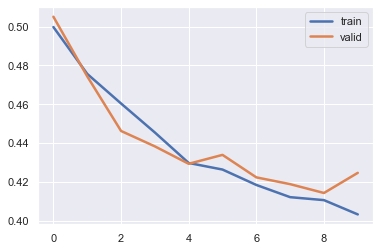

In [62]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

Plotting the train and test accuracy

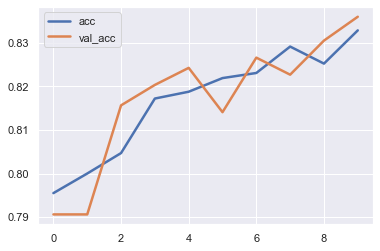

In [63]:
# Plot accuracy per iteration
plt.plot(hist['accuracy'], label='acc')
plt.plot(hist['val_accuracy'], label='val_acc')
plt.legend()

Evaluation





In [64]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 683us/step - loss: 0.4228 - accuracy: 0.8320


In [65]:
print(score)

[0.42278140783309937, 0.8320000171661377]


Confusion Matrix on unseen test set

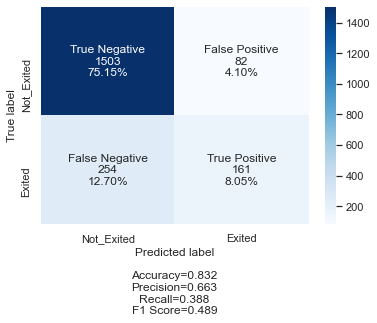

In [66]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm1=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

# Conclusion 

The model performed quite well with 85.2% accuracy on the test data

Precision is also good with 82.2%

Recall is quite less with 36.6%

F1 score is also quite less with 50.7%


<font color='blue' size=5px><b> Next Model </b></font>

Now we will try with 3 hidden layers

We will also use the EarlyStopping method for stopping training when the val_loss metrics stops improving

We will use relu as activation for hidden layers and sigmoid for output layer

We will also use Adam as optimizer with learning rate hard coded to 0.001

We will use GlorotNormal to initialise the kernel and bias

we are also using dropout with rate=50% to prevent overfitting

Batch_size-50 Epochs=150

In [67]:
#Training Multi-layer perceptron with 3 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
                              verbose=0, mode='min', restore_best_weights= True)

initializer =tf.keras.initializers.GlorotNormal()
activation='relu'#tf.keras.layers.LeakyReLU(alpha=0.3)
output_activation='sigmoid'
dropout_rate=0.5
optimizer = Adam(learning_rate=.001)

Model2 = Sequential()
#Initializing the weights uisng GlorotNormal 
Model2.add(Dense(16, input_shape=(11, ), kernel_initializer=initializer,bias_initializer=initializer, activation=activation))
Model2.add(Dropout(dropout_rate))
Model2.add(Dense(32, kernel_initializer=initializer,bias_initializer=initializer, activation=activation))
Model2.add(Dropout(dropout_rate))
Model2.add(Dense(64, kernel_initializer=initializer,bias_initializer=initializer, activation=activation))
Model2.add(Dropout(dropout_rate))
Model2.add(Dense(1, kernel_initializer=initializer,bias_initializer=initializer, activation=output_activation))

Model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=50,epochs=150, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/150
103/103 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.7816 - val_loss: 0.4996 - val_accuracy: 0.7906
Epoch 2/150
103/103 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.8000 - val_loss: 0.5017 - val_accuracy: 0.7906
Epoch 3/150
103/103 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.8000 - val_loss: 0.4982 - val_accuracy: 0.7906
Epoch 4/150
103/103 [==============================] - 0s 1ms/step - loss: 0.4943 - accuracy: 0.8000 - val_loss: 0.4951 - val_accuracy: 0.7906
Epoch 5/150
103/103 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.8000 - val_loss: 0.4890 - val_accuracy: 0.7906
Epoch 6/150
103/103 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.8000 - val_loss: 0.4910 - val_accuracy: 0.7906
Epoch 7/150
103/103 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.8000 - val_loss: 0.4844 - val_accuracy: 0.7906

103/103 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8291 - val_loss: 0.3895 - val_accuracy: 0.8539
Epoch 58/150
103/103 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8357 - val_loss: 0.3846 - val_accuracy: 0.8625
Epoch 59/150
103/103 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8342 - val_loss: 0.3871 - val_accuracy: 0.8531
Epoch 60/150
103/103 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8369 - val_loss: 0.3830 - val_accuracy: 0.8586
Epoch 61/150
103/103 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8375 - val_loss: 0.3820 - val_accuracy: 0.8594
Epoch 62/150
103/103 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8395 - val_loss: 0.3794 - val_accuracy: 0.8586
Epoch 63/150
103/103 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8377 - val_loss: 0.3822 - val_accuracy: 0.8555
Epoch

Calculating loss for each epoch

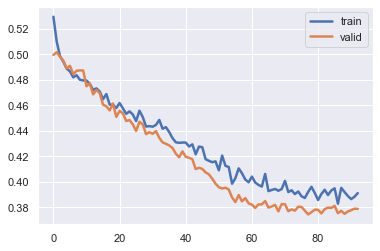

In [68]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

Calculating accuracy for each epoch

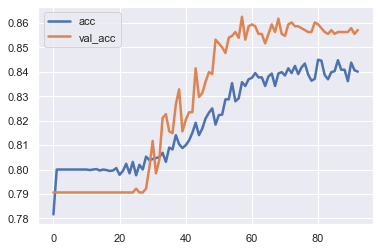

In [69]:
# Plot accuracy per iteration
plt.plot(hist['accuracy'], label='acc')
plt.plot(hist['val_accuracy'], label='val_acc')
plt.legend()

Evaluating on Test data model never seen 

In [70]:
score = Model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 622us/step - loss: 0.3598 - accuracy: 0.8570


In [71]:
print(score)

[0.35979118943214417, 0.8569999933242798]


Confusion Matrix on unseen test set

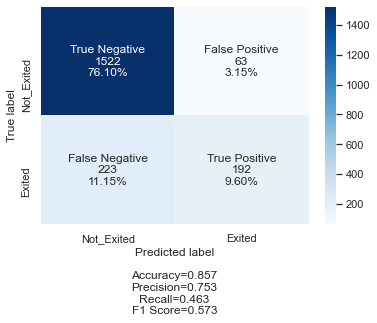

In [72]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

# Conclusion

The performance improved slighly to 85.8%

Precision increased drastically from 74.7% to 84.6%

Recall improved a bit to 38.3%

F1 score improved a bit to 52.7%


<font color='blue' size=5px><b> Last Model </b></font>

Now we will build a model with 2 hidden layers. First hidden layer will have 128 neurons and 2nd layer will have 64 neurons

We are using relu as activation for hidden layer and sigmoid as activation for output layer

we are initializing kernel and bias with GlorotNormal

Again we are using EarlyStopping with monitoring on val_loss metrics

we are also using dropout with rate=50% to prevent overfitting

Also this time we are using Adam optimizer but with a ExponentialDecay

Batch_size=1000 epochs=100



In [73]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
                              verbose=0, mode='min', restore_best_weights= True)

initializer = tf.keras.initializers.GlorotNormal()
activation='relu'
output_activation='sigmoid'
dropout_rate=0.5
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

Model3 = Sequential()
#Initializing the weights uisng GlorotNormal 
Model3.add(Dense(128, input_shape=(11, ), kernel_initializer=initializer,bias_initializer=initializer, activation=activation))
Model3.add(Dropout(dropout_rate))
Model3.add(Dense(64, kernel_initializer=initializer,bias_initializer=initializer, activation=activation))
Model3.add(Dropout(dropout_rate))
Model3.add(Dense(1, kernel_initializer=initializer,bias_initializer=initializer, activation=output_activation))

Model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
his_mod3= Model3.fit(X_train, y_train, validation_split=0.2, batch_size=50,epochs=100, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/100
103/103 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7648 - val_loss: 0.4686 - val_accuracy: 0.7922
Epoch 2/100
103/103 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7898 - val_loss: 0.4485 - val_accuracy: 0.7992
Epoch 3/100
103/103 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7994 - val_loss: 0.4391 - val_accuracy: 0.8188
Epoch 4/100
103/103 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.8084 - val_loss: 0.4304 - val_accuracy: 0.8164
Epoch 5/100
103/103 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.8109 - val_loss: 0.4255 - val_accuracy: 0.8219
Epoch 6/100
103/103 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.8174 - val_loss: 0.4247 - val_accuracy: 0.8141
Epoch 7/100
103/103 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8090 - val_loss: 0.4231 - val_accuracy: 0.8156

*italicized text* Plotting loss at different epochs

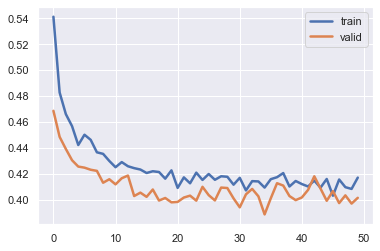

In [74]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod3.history)
hist['epoch'] = his_mod3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

# Plot accuracy per iteration

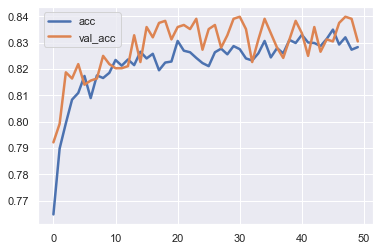

In [75]:
# Plot accuracy per iteration
plt.plot(hist['accuracy'], label='acc')
plt.plot(hist['val_accuracy'], label='val_acc')
plt.legend()

Evaluating the model on the never seen test data

In [76]:
score = Model3.evaluate(X_test, y_test)

63/63 [==============================] - 0s 611us/step - loss: 0.3774 - accuracy: 0.8405


In [77]:
print(score)

[0.3773720860481262, 0.840499997138977]


Confusion Matrix on unseen test set

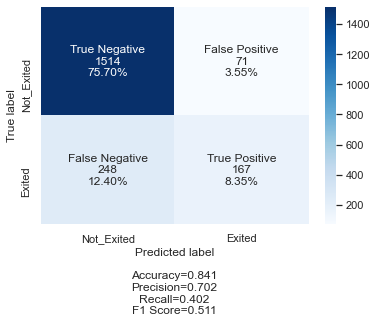

In [78]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred1 = Model3.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm3=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

# Conclusion


The performance improved slighly to 85.9%

Precision decreased drastically from 84.6% to 78.5%

Recall improved a bit to 44.1%

F1 score improved a lot to 56.5% from 52.7

---


<font color='green' size=6px><b> Model Performance Improvement </b></font>

---

# Which metrics to chose

* Since this is a classification problem we will be checking the Accuracy,Precision,Recall and F1 score parameters
* So we use precision and recall as per below criteria
  * Precision: Appropriate when minimizing false positives is the focus.
  * Recall: Appropriate when minimizing false negatives is the focus.
* Here we want to find out whether customer will leave or not. So if we predict they will leave and they dont its okay because bank will still retain their business. But if we predict they wont leave and they do leave its a loss of business to bank. So basically we want to minimised false negatives or a higher recall.

# How to improve model performance

The below steps were taken to improve the performance in the above 3 models
* Diagnostics- by seeing the diagnostics we were able to see whether the model is overfitting and then act accordingly
* Weight Initialization- we used different weight initialization techniques like RandomNormal,RandomUniform,Zero,one,GlorotNormal(Xavier)
* Learning rate- we hardcoded the value as well as used ExponentialDecay which decreases with each epoch
* Activation Function- We tried different activation functions like relu,sigmoid,softmax,tanh
* Network Topology- We tried with different number of hidden layers and different number of neurons in each layers
* Batches and epochs- We tried with differnt number of batches and epochs
* Regularization- we dropped the neurons to make sure there is no overfitting.
* EarlyStopping- we implemented early stopping to stop trining the model once the model performance started deteoriating
* Optimization  - We tried with different optimization techniques like adam, SGD,RMSprop,Adamdelta
* loss- we tried with binary_cross_entropy and categorical entropy

---


<font color='green' size=6px><b> Model Performance Evaluation </b></font>

---

Has been mentioned at the end of each model

---


<font color='green' size=6px><b> Conclusion and key takeaways </b></font>

---

* France has highest number of customers. Germany and spain have very less so try to get more customers there
* only 30% have credit card. Try to offer some promotions so people start using them
* Germany has more number of Exited customers percentage wise
* Females has more number of Exited customers percentage wise
* Between 50-60 we see a large number of Exited customers percentage wise
* Tenure seems to have almost no effect on attrition
* Customers having 3 or 4 customers seem to have a large number of Exited customers percentage wise.But the total customers in these 2 categories are quite low as compared to 1and 2 so might not give the right picture
* Having a credit card seems to have no effect on Exit
* CreditScore is almost same accross Geographies and Exited
* Minimum Balance for Males who have exited is much more than Females
* All of the customers having 4 NoOfProducts Exited
* EstimatedSalary seems to have no relation with Having a credit card and Exited
* Exited customers appear more with higher Minimum Balance

